## Life Expentacy GDP

## Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python modules

The basic modules for the project. `Pandas` for data manipulation; `Matplotlib` and `Seaborn` for data visualization.

In [60]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Data

Looking at the raw data for the first time. Using `.read_csv()` method to transform the CSV file into a DataFrame.
Then with the `.head()` method to visualize the first 5 row of the DataFrame.

In [61]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploring the Data

Looking at the different values of the rows and columns. Are they ordinary or nomial values,categorial or quantitative,  are unique values present, etc.

In [62]:
print('List of unique countries:', df.Country.unique())
print('List of unique years:', df.Year.unique())
print('List of unique life expectancy years:', df['Life expectancy at birth (years)'].unique())
print('List of unique GDP:', df.GDP.unique())


List of unique countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
List of unique years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
List of unique life expectancy years: [77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]
List of unique GDP: [7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.75213000e+12 3.55218000e+12
 4.59821000e+12 5.1

From the analysis previously done, the `Country` and `Year` columns are the only ones worth having their unique values sisce they are **cualitative**. The other 2 are **quantitative** and beter for other types of analysis.

#### Cleaning Column Names

Looking at the names of the columns, ther are some that doesn't make it easier to code, so it's better to cahnge their names. For this the `.rename()` method works perfectly.
Changing `Country`, `Year` and `GDP` to `country`, `year` and `gdp` just to have everything in lowercase. Then `Life expectancy at birth (years)` to `LEABY` that is its acronym in lowecase.

In [63]:
df = df.rename({'Country' : 'country','Year' : 'year', 'Life expectancy at birth (years)' : 'leaby', 'GDP' : 'gdp'}, axis= 'columns')
df.head()

,country,year,leaby,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

To explote the continuous numeric values of `gdp`, the best course of action is with a **histogram**. For the *discrete numeric values* of the `leaby` column the histogram is also used although other visulatizations can be used like **bar charts**.

Here the `gdp` shows to be *right skewed* while the `leaby` is the total opposite being *left skewed*.

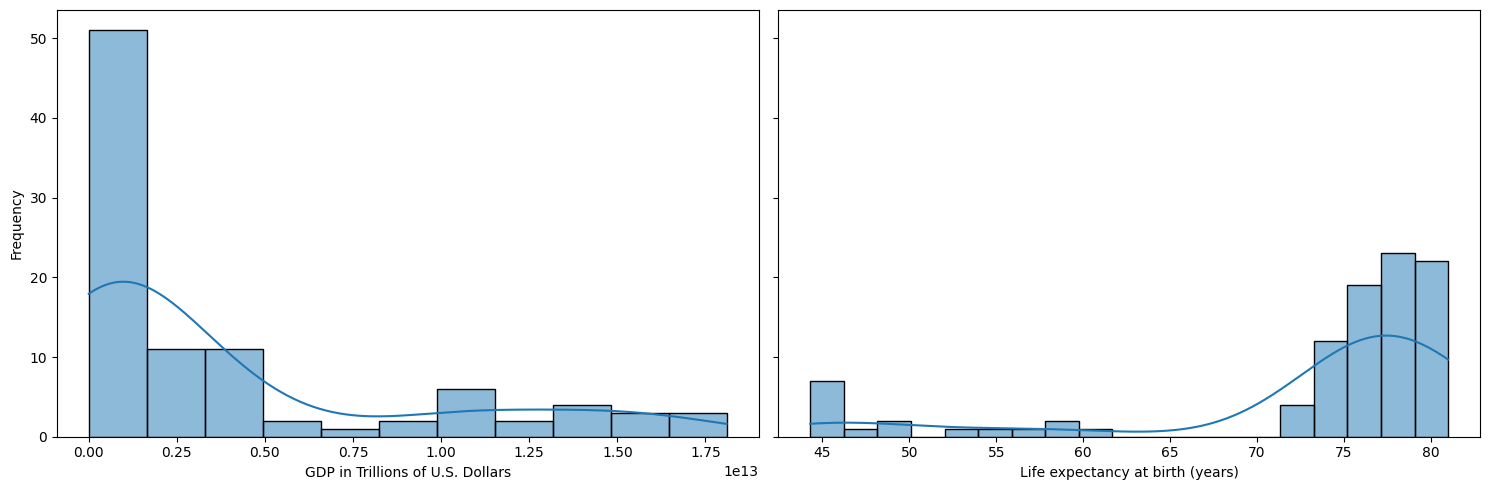

In [64]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

sns.histplot(data=df, x='gdp', kde=True, ax=axes[0])
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df, x='leaby', kde=True, ax=axes[1])
axes[1].set_xlabel("Life expectancy at birth (years)")

plt.tight_layout()
plt.show()

#### Scatter plot

The previous plots didn't breake data by **countries**, so a sub-DataFrame is needed. It will exclude the `year` column and use the `.groupby()` method with the `country` column. With this, it is possible to find the mean `leaby` and `gdp`. 

In [65]:
df_mean = df.drop('year', axis= 1).groupby('country').mean().reset_index()
df_mean

,country,leaby,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09



Since there is a **multivariate relationship** 1 categorical and 2 quantitative, the best visualization method is a **scatter plot**. On the X and Y axis the quantitative (`gdp` and `leaby` respectively) and the hue or colors are the categorical (`country`). 

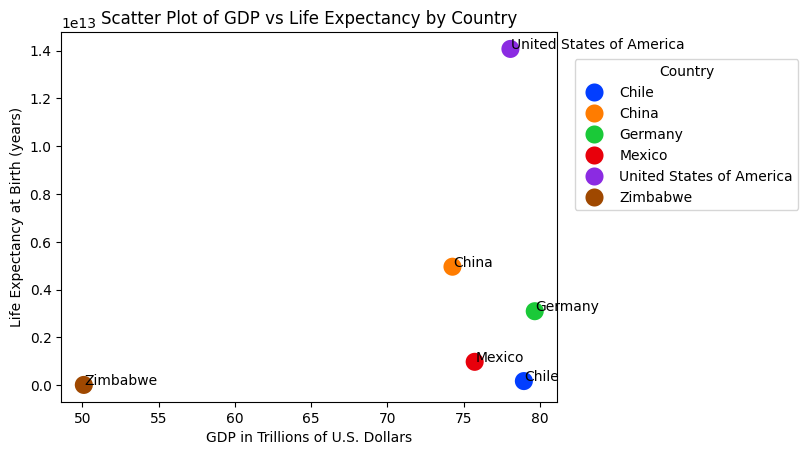

In [66]:
sns.scatterplot(data=df_mean, x='leaby', y='gdp', hue='country', palette='bright', s=200)
for i in range(df_mean.shape[0]):
    plt.text(x=df_mean.leaby[i] + 0.03, y=df_mean.gdp[i] + 0.3, s=df_mean.country[i], 
             fontdict=dict(color='black', size=10))

# Configurar etiquetas
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Scatter Plot of GDP vs Life Expectancy by Country")

# Mostrar la leyenda
plt.legend(title='Country', loc='lower right', bbox_to_anchor= (1.5, 0.5), ncol= 1)

This **scatter plot** only shows the information from a sub-DataFrame, it lacks information but for a simple analysis it's perfect.


To show more information, it is necesary to use the DataFrame `df`.

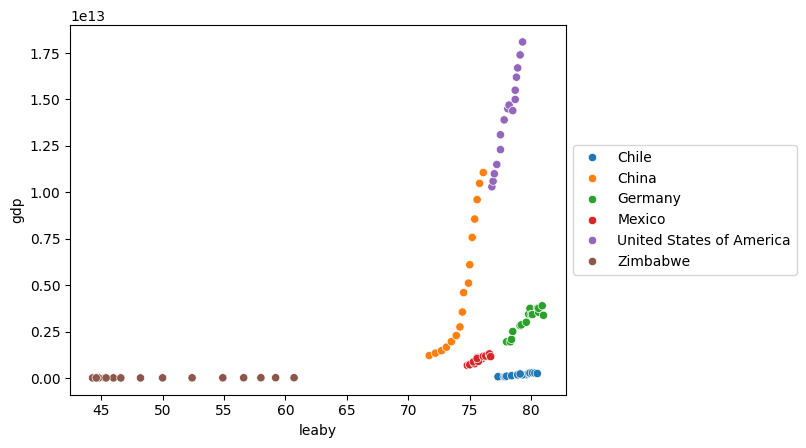

In [67]:
sns.scatterplot(x=df.leaby, y=df.gdp, hue=df.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In the chart below, it looks like the previous charts where `gdp` for 'Zimbabwe' is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as `gdp` goes up. The 'US' and 'China' seem to have very similar slopes in their relationship between `gdp` and life expectancy.

Some information might no be so easily visulaized with this many graphs. for example the 'United States of America' and 'China' graph are too above the others. With *individual plots* each graph can show more deatail.

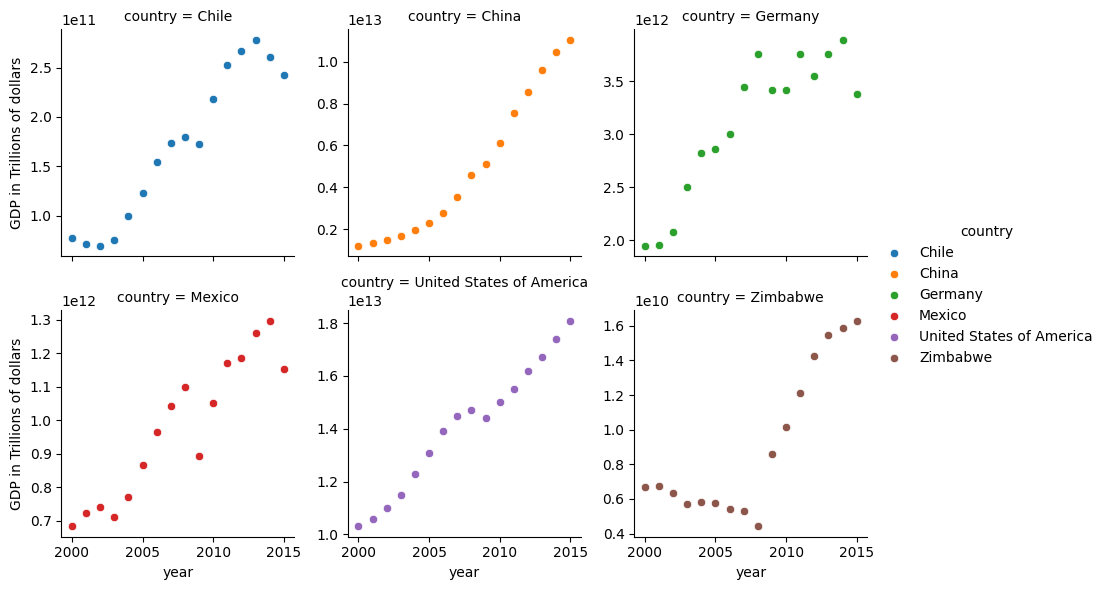

In [68]:
graph = sns.FacetGrid(df, col= 'country', col_wrap= 3, hue= 'country', sharey= False)
graph = graph.map(sns.scatterplot, 'year', 'gdp').add_legend().set_axis_labels('year', 'GDP in Trillions of dollars')

Some plots are simiral while other show steeper slopes. 'Zimbawe' stayed the same while the rest of the conuntries show more data due to each having their **own y-axis values**.

'Zimbawe' now shows an increment in 'gdp' something that previously wasn't seen. 'China' and 'US' is pretty much the same, and for the others there are some values that show thagt the tendency is no as straight as though before.

#### Swarm Plots

Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. Useful to explore data that might be missed or hard to see in the previous **scatter plot**.

c:\Users\sebog\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sebog\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 25.722222222222214, 'Life expectancy at birth (years)')

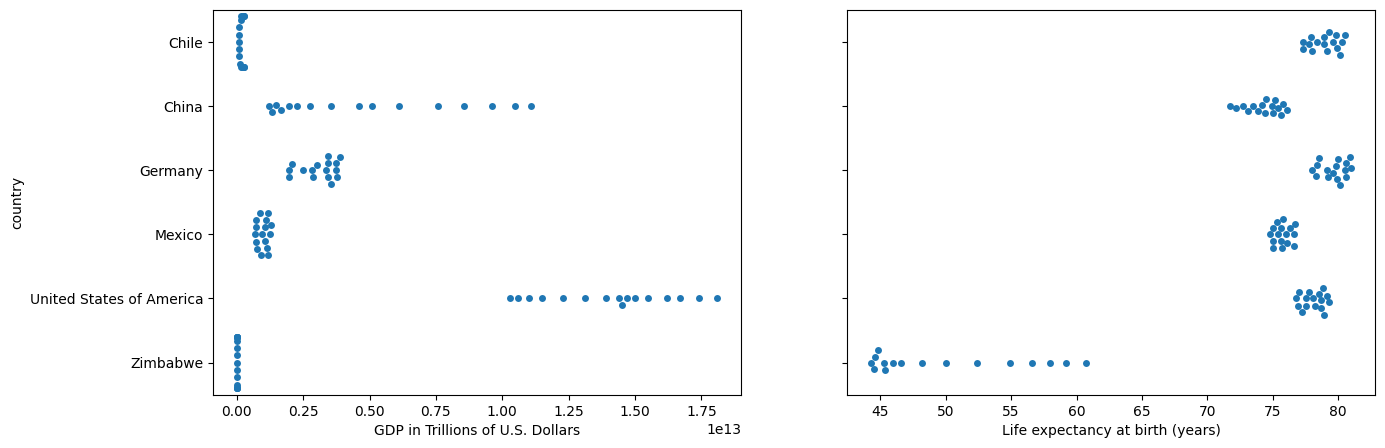

In [69]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

axes[0] = sns.swarmplot(data=df, x='gdp', y= 'country', ax=axes[0])
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(data=df, x='leaby', y= 'country', ax=axes[1])
axes[1].set_xlabel("Life expectancy at birth (years)")

#### Line Charts

Useful to explore data *over time*. Here are the countries, separated by color, exploring the `gdp` and `leaby`. 

Text(0, 0.5, 'GDP in Trillions of dollars')

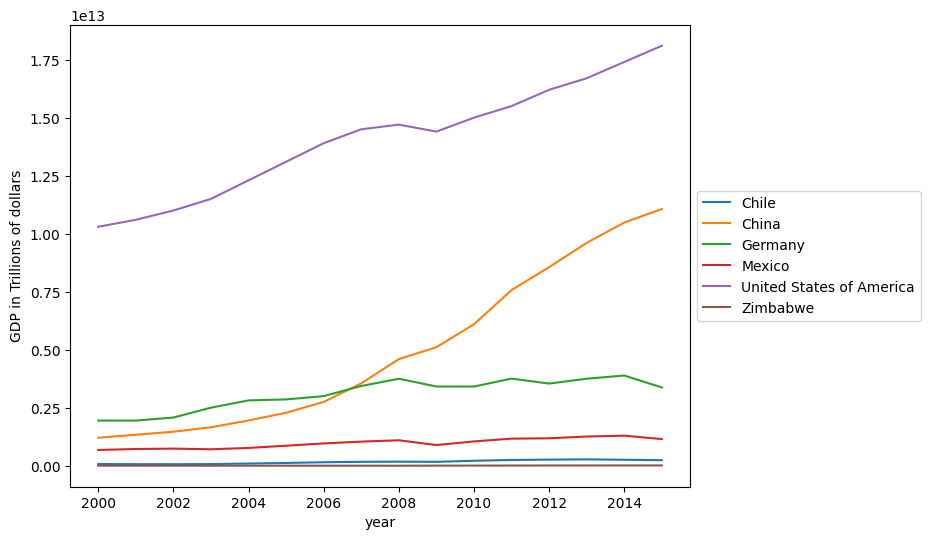

In [70]:
plt.figure(figsize=(8, 6))
sns.lineplot(data= df, x='year', y='gdp', hue='country')
plt.legend(loc= 'center left', bbox_to_anchor= (1, 0.5), ncol= 1)
plt.ylabel('GDP in Trillions of dollars')

China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.


Some information might no be so easily visulaized with this many graphs. for example the 'United States of America' and 'China' graph are too above the others. With *individual plots* each graph can show more deatail.

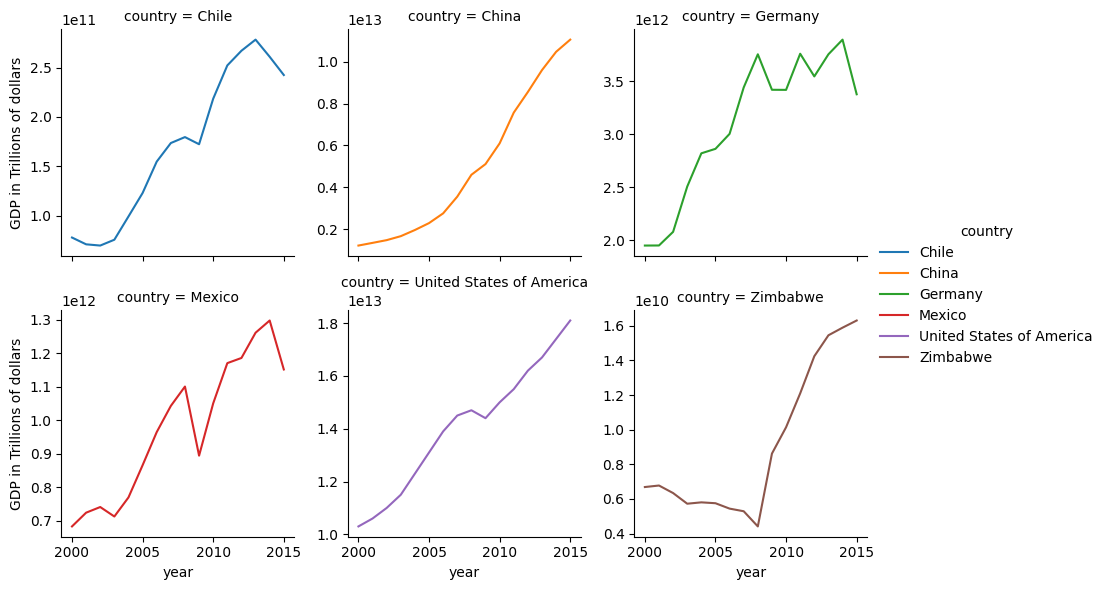

In [71]:
graph_gdp = sns.FacetGrid(df, col= 'country', col_wrap= 3, hue= 'country', sharey= False)
graph_gdp = graph_gdp.map(sns.lineplot, 'year', 'gdp').add_legend().set_axis_labels('year', 'GDP in Trillions of dollars')

'United States of America' and 'China' graph are almost the same as before, but the rest show steeper incliniation due to ech having their **own y-axis values**.


The same can be done for the `leaby` column. Get all the different line graphs and then individual ones.

Text(0, 0.5, 'Life expectancy at birth (years)')

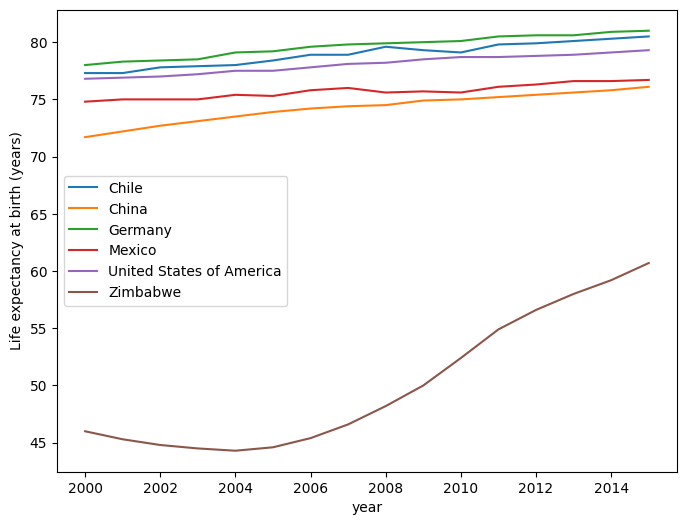

In [72]:
plt.figure(figsize=(8, 6))
sns.lineplot(data= df, x='year', y='leaby', hue='country')
plt.legend(loc= 'center left', bbox_to_anchor= (0, 0.5), ncol= 1)
plt.ylabel('Life expectancy at birth (years)')

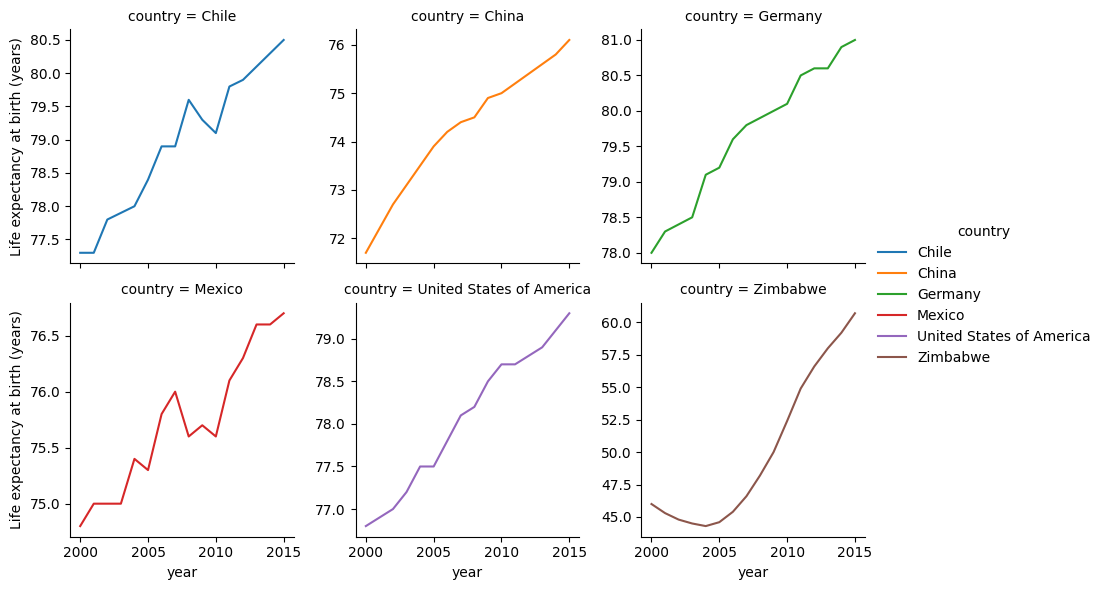

In [73]:
graph_leaby = sns.FacetGrid(df, col= 'country', col_wrap= 3, hue= 'country', sharey= False)
graph_leaby = graph_leaby.map(sns.lineplot, 'year', 'leaby').add_legend().set_axis_labels('year', 'Life expectancy at birth (years)')

Just like before, some line graphs are simiral while other show steeper slopes. 'Zimbawe' stayed the same while the rest of the conuntries show more data due to each having their **own y-axis values**.

## Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.